# Objectives

We are using the UCI Heart Disease Data after wrangling in the file data/heart.csv

We will try to predict the indication of heart disease in the target variable.

In this notebook we will do predictive modeling using the pre-processed data files from the Feature Engineering notebook.

We will build 4 different models: Logistic Regression, Decision Tree, Random Forest and k Nearest Neighbor.


# 1. Load the data from the X and y train and test files.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, confusion_matrix
import seaborn as sns
import math

from library.sb_utils import save_file

In [24]:
X_train = pd.read_csv('../data/X_train.csv')
Xs_train = pd.read_csv('../data/Xs_train.csv')
X_test  = pd.read_csv('../data/X_test.csv')
Xs_test  = pd.read_csv('../data/Xs_test.csv')

y_train = pd.read_csv('../data/y_train.csv')
y_test  = pd.read_csv('../data/y_test.csv')

pd.options.display.float_format = '{:.4f}'.format
print(X_train.mean(), '\n', X_test.mean())

Age           54.2149
Sex            0.6736
ChestPain      2.7934
SystolicBP   130.9504
Chol         246.0000
Glucose        0.1529
RestECG        0.4876
STMaxRate    151.0661
STPain         0.2934
STWave         0.9752
NumColor       0.6281
STSlope_1      0.4628
STSlope_2      0.4711
Defects_1      0.0496
Defects_2      0.5744
Defects_3      0.3678
dtype: float64 
 Age           54.9672
Sex            0.7213
ChestPain      3.0984
SystolicBP   134.2951
Chol         247.3115
Glucose        0.1311
RestECG        0.5574
STMaxRate    144.0164
STPain         0.4590
STWave         1.1475
NumColor       0.8033
STSlope_1      0.4590
STSlope_2      0.4590
Defects_1      0.0984
Defects_2      0.4426
Defects_3      0.4590
dtype: float64


In [25]:
## Make y's into Series, not DataFrames, to silence model warnings.
y_train = y_train['AngioTgt']
y_test  = y_test['AngioTgt']

### Data check

The means of our train and test sets are not exactly identical, which is fine since the test set is meant to show how the model responds to new data.  The test set has a higher proportion of males, subjects with ChestPain, higher SystolicBP, RestECG, STPain, STWave, NumColor and Defects values 1 and 3.  The test set subjects have a lower average STMaxRate and Defects value 2.  

In [26]:
print(Xs_train.mean(), '\n', Xs_test.mean())

Age_SS           0.0000
Sex              0.6736
ChestPain        2.7934
SystolicBP_SS    0.0000
Chol_SS         -0.0000
Glucose          0.1529
RestECG          0.4876
STMaxRate_SS    -0.0000
STPain           0.2934
STWave           0.9752
NumColor         0.6281
STSlope_1        0.4628
STSlope_2        0.4711
Defects_1        0.0496
Defects_2        0.5744
Defects_3        0.3678
dtype: float64 
 Age_SS           0.0000
Sex              0.7213
ChestPain        3.0984
SystolicBP_SS   -0.0000
Chol_SS         -0.0000
Glucose          0.1311
RestECG          0.5574
STMaxRate_SS    -0.0000
STPain           0.4590
STWave           1.1475
NumColor         0.8033
STSlope_1        0.4590
STSlope_2        0.4590
Defects_1        0.0984
Defects_2        0.4426
Defects_3        0.4590
dtype: float64


### Scaled data check

Our standardized scaling looks good.  All four features (Age, SystolicBP, Chol and STMaxRate) and 0 means as they should.  Our unscaled numbers match, as they should.

In [27]:
def plot_confusion(title, model, x, y, score):
    
    predictions = model.predict(x)
    cm = confusion_matrix(y, predictions)

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = title + '\nAccuracy Score: {0}%\nRsquared = {1}'\
        .format(round(100*score, 1), round(r2_score(y, predictions),3))
    plt.title(all_sample_title, size = 15);

# 2. Logistic Regression

We will use the unscaled training and test sets for a Logistic Regression algorithm.

C:\Users\bradd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8512396694214877 0.8688524590163934
[-2.83365624 -1.63861881 -1.27889158 -3.48255091 -1.92507305 -0.65603036
 -4.57533465  1.5504163  -4.14050184 -5.21385895  1.75142029  0.05491005
 -3.96479773 -2.15664931  3.77985234 -3.56119875 -0.12839115  1.75651061
 -0.15498801 -5.29841254  2.33769451 -5.38235821  2.3742173   1.58363067
 -1.19890266 -3.4022649  -2.39065718 -3.72931894  3.93778413  2.57208664
  3.53208078 -1.1272815  -5.88866761 -3.88287068 -4.10656071  2.99780183
  3.333087    2.60442349 -1.82211136  1.54126077 -0.04034746  4.14635035
 -5.60353377  0.26764692  3.32431525 -2.93387468 -4.88063907 -0.4805176
 -2.03372267  0.58040569 -0.34285748  1.31803877 -3.90240979 -2.26301702
  3.79681105  2.25821297  2.32694948  1.26289507 -1.07867376  2.75622391
 -0.66419885]


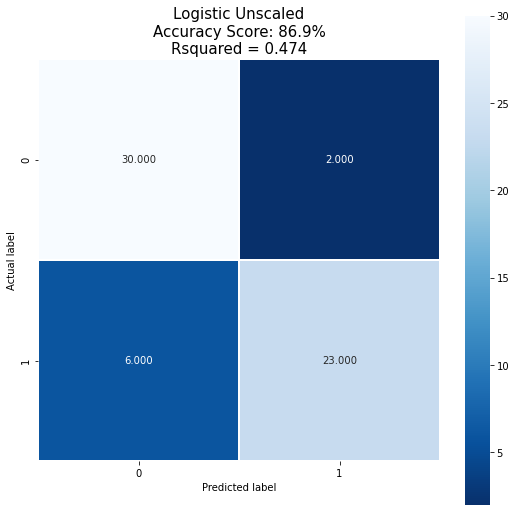

In [28]:
LogReg = LogisticRegression(max_iter=1000)

LogReg.fit(X_train, y_train)

train_score = LogReg.score(X_train, y_train)
score = LogReg.score(X_test, y_test)

print (train_score, score)
print(LogReg.decision_function(X_test))
plot_confusion("Logistic Unscaled", LogReg, X_test, y_test, score)

0.8471074380165289 0.8688524590163934
[-2.64125305 -1.11222211 -1.2908136  -3.06915486 -1.68078917 -0.41873065
 -4.2998809   1.6851221  -3.87428222 -4.56910001  1.96129274  0.19364686
 -3.49619054 -1.77916339  3.80336347 -3.36865322  0.02888033  1.81235304
  0.10098092 -5.01491977  2.62624174 -5.16396146  2.52840666  1.77953428
 -0.98596676 -3.01887796 -1.93509806 -3.5455889   3.98972783  2.87736443
  3.7070181  -0.88348673 -5.4209143  -3.65622359 -3.76136176  3.13603221
  3.81825931  2.64008568 -1.68304872  1.61336497 -0.00554494  4.28437538
 -5.17805316  0.52777301  3.35962703 -2.48027062 -4.65701767 -0.45508275
 -1.56555927  0.69670947 -0.1029108   1.48875746 -3.7735563  -2.06407995
  3.81616762  2.46372172  2.47484858  1.53774295 -0.36753602  2.80873541
 -0.5347617 ]


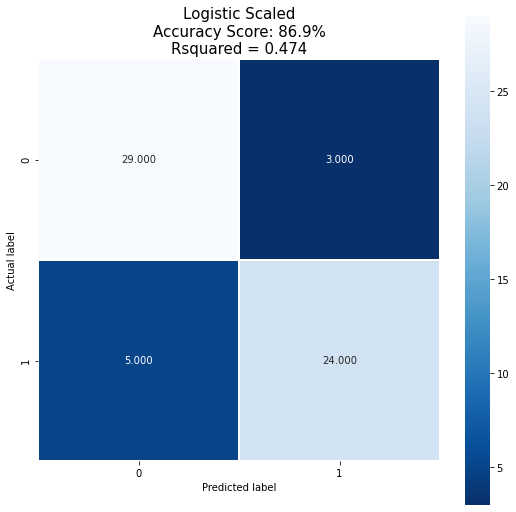

In [29]:
## The algorithm doesn't converge, even after bumping max_iter up from 100 to 1000.  Use the scaled data.
## Despite not converging, the accuracy isn't bad, 86.9%, which is actually HIGHER than the accuracy against the training set.

LogReg.fit(Xs_train, y_train)

train_score = LogReg.score(Xs_train, y_train)
score = LogReg.score(Xs_test, y_test)

print (train_score, score)
print(LogReg.decision_function(Xs_test))
plot_confusion("Logistic Scaled", LogReg, Xs_test, y_test, score)

### Logistic Regression Scores

The algorithm converged using the scaled data.  The accuracy is exactly the same as reported by the uncoverged algorithm against the unscaled data:  86.9%.   The training set accuracy went down slightly from 85.1% to 84.7%.  

In the confusion matrix, exactly one case moved from predicted 0 in the Unscaled run to 1 in Scaled for both rows (actual = 0 and 1).  Rsquared is the same for both, 0.474.

Not a bad start.  Let's compare against other algorithms.

# 3. Decision Tree

Let's try a simple decision tree before running a Random Forest.

1.0 0.7704918032786885
9 46
1.0 0.819672131147541
9 46


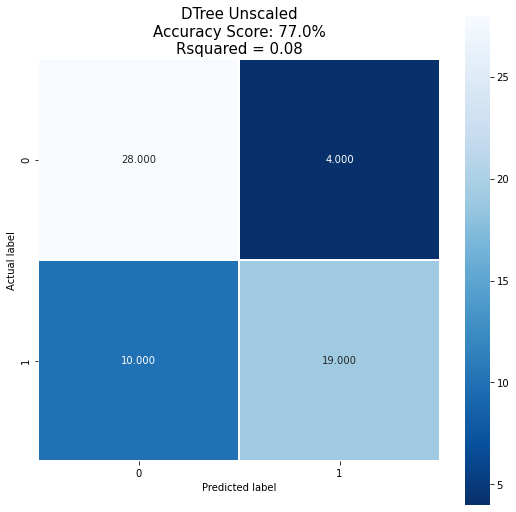

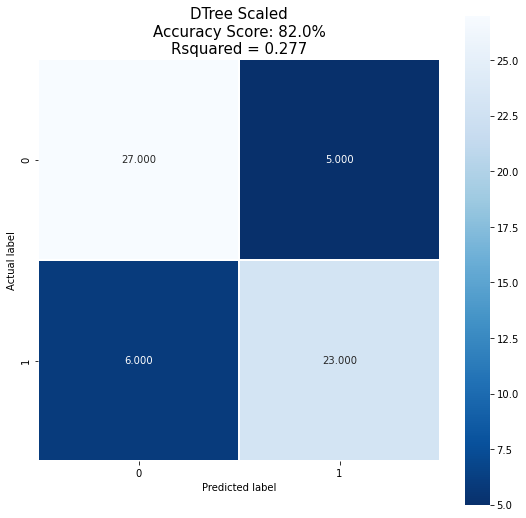

In [30]:
DTree = DecisionTreeClassifier(random_state = 21)
DTree.fit(X_train, y_train)

train_score = DTree.score(X_train, y_train)
score = DTree.score(X_test, y_test)

print (train_score, score)
print(DTree.get_depth(), DTree.get_n_leaves())
plot_confusion("DTree Unscaled", DTree, X_test, y_test, score)

## Try the scaled data
DTree.fit(Xs_train, y_train)

train_score = DTree.score(Xs_train, y_train)
score = DTree.score(Xs_test, y_test)

print (train_score, score)
print(DTree.get_depth(), DTree.get_n_leaves())
plot_confusion("DTree Scaled", DTree, Xs_test, y_test, score)

### Decision Tree Score

Scaling definitely helped this Decision Tree model.  The accuracy is better using the scaled data: 82.0% up from 77.0% using the unscaled data.  The Rsq shows a dramatic improvement from 0.08 to 0.277.  The confusion matrix has fewer false predictions and is better in the lower right (1, 1).

However, this Decision Tree is still inferior to the Logistic Regression.  Logistic beats the Decision Tree 86.9% vs. 82% accuracy and 0.474 vs. 0.277 Rsquared.

# 4. Random Forest

# 5. K Nearest Neighbors